# Liver Cirrhosis Stage Prediction

## Context

Cirrhosis is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism. The following data contains the information collected from the Mayo Clinic trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984. A description of the clinical background for the trial and the covariates recorded here is in Chapter 0, especially Section 0.2 of Fleming and Harrington, Counting
Processes and Survival Analysis, Wiley, 1991. A more extended discussion can be found in Dickson, et al., Hepatology 10:1-7 (1989) and in Markus, et al., N Eng J of Med 320:1709-13 (1989).

A total of 424 PBC patients, referred to Mayo Clinic during that ten-year interval, met eligibility criteria for the randomized placebo-controlled trial of the drug D-penicillamine. The first 312 cases in the dataset participated in the randomized trial and contain largely complete data. The additional 112 cases did not participate in the clinical trial but consented to have basic measurements recorded and to be followed for survival. Six of those cases were lost to follow-up shortly after diagnosis, so the data here are on an additional 106 cases as well as the 312 randomized participants.

![Stages of Liver Damage](https://www.researchgate.net/profile/Amir-Ziaee/publication/343712197/figure/fig1/AS:925738282782720@1597724614341/Stages-of-liver-damage.jpg)

## Attribute Information

Attribute Information
1) ID: unique identifier
2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
4) Drug: type of drug D-penicillamine or placebo
5) Age: age in [days]
6) Sex: M (male) or F (female)
7) Ascites: presence of ascites N (No) or Y (Yes)
8) Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
9) Spiders: presence of spiders N (No) or Y (Yes)
10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
11) Bilirubin: serum bilirubin in [mg/dl]
12) Cholesterol: serum cholesterol in [mg/dl]
13) Albumin: albumin in [gm/dl]
14) Copper: urine copper in [ug/day]
15) Alk_Phos: alkaline phosphatase in [U/liter]
16) SGOT: SGOT in [U/ml]
17) Triglycerides: triglicerides in [mg/dl]
18) Platelets: platelets per cubic [ml/1000]
19) Prothrombin: prothrombin time in seconds [s]
20) Stage: histologic stage of disease (1, 2, 3, or 4)

## Description of Medical Terminologies

ID (Identifier): A unique code assigned to each individual or patient for the purpose of identification.

N_Days (Number of Days): The number of days between the registration of the patient and the earlier of death, transplantation, or study analysis time in July 1986.

Status: Describes the status of the patient at the end of the observation period. C (Censored), CL (Censored due to liver transplantation), or D (Death).

Drug: The type of drug administered to the patient, either D-penicillamine or placebo.

Age: Age of the patient, typically provided in days in this context.

Sex: Gender of the patient, M for male or F for female.

Ascites: Presence (Y) or absence (N) of abnormal fluid accumulation in the abdominal cavity, often associated with liver disease.

Hepatomegaly: Enlargement of the liver, indicated by Y (Yes) or N (No).

Spiders: Presence (Y) or absence (N) of spider angiomas, which are small, dilated blood vessels near the surface of the skin often associated with liver disease.

Edema: Presence of swelling, indicated by N (no edema and no diuretic therapy), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy).

Bilirubin: Serum bilirubin level in milligrams per deciliter (mg/dl), a measure of liver function and the breakdown of red blood cells,Normal range: 0.1 to 1.2 mg/dl

Cholesterol: Serum cholesterol level in milligrams per deciliter (mg/dl), a measure of the amount of cholesterol in the blood.,Normal range: Total cholesterol level less than 200 mg/dl

Albumin: Albumin level in grams per deciliter (gm/dl), a protein produced by the liver that helps maintain blood volume and pressure.,Normal range: 3.5 to 5.5 gm/dl

Copper: Urine copper level in micrograms per day (ug/day), which can be relevant in the diagnosis of Wilson's disease, a genetic disorder affecting copper metabolism.,No specific threshold values provided. The normal range may vary, and abnormal values could indicate a potential issue.

Alk_Phos (Alkaline Phosphatase): Alkaline phosphatase level in Units per liter (U/liter), an enzyme that can be elevated in various liver and bone disorders.,Normal range: 20 to 140 U/liter

SGOT (Serum Glutamic Oxaloacetic Transaminase): SGOT level in Units per milliliter (U/ml), an enzyme released into the blood when the liver or heart is damaged.,Normal range: 8 to 48 U/ml

Triglycerides: Triglyceride level in milligrams per deciliter (mg/dl), a type of fat found in the blood that can be associated with liver function,Normal range: Less than 150 mg/dl

Platelets: Platelet count per cubic milliliter per 1000, a measure of the number of blood platelets, important for blood clotting. ,Normal range: 150,000 to 450,000 platelets per cubic millimeter

Prothrombin: Prothrombin time in seconds (s), a measure of the time it takes for blood to clot, often used to assess liver function, Normal range: 11 to 13 seconds

Stage: Histologic stage of disease, typically graded from 1 to 4, indicating the severity or extent of the disease based on histological examination of tissues.

## 1. Import Libraries

In [1070]:
# For EDA and Preprocessing
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

## 2. Load Dataset

In [1071]:
cirrhosis_data = pd.read_csv('D:\ML\Liver Cirrhosis Prediction\cirrhosis.csv')

In [1072]:
#Listing the first five rows
cirrhosis_data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


## 3. Exploratory Data Analysis

In [1073]:
#check datasets shape
cirrhosis_data.shape

(418, 20)

In [1074]:
cirrhosis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [1075]:
# Check dataset columns
cirrhosis_data.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [1076]:
#Check datatypes of the columns
cirrhosis_data.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [1077]:
# Drop duplicate data
cirrhosis_data = cirrhosis_data.drop_duplicates()
cirrhosis_data

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [1078]:
# Transfrom Age from days to years
cirrhosis_data['Age'] = (cirrhosis_data['Age']/365).round()
cirrhosis_data['Age']

0      59.0
1      56.0
2      70.0
3      55.0
4      38.0
       ... 
413    67.0
414    39.0
415    57.0
416    58.0
417    53.0
Name: Age, Length: 418, dtype: float64

In [1079]:
cirrhosis_data.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,50.772727,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,10.442880,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,26.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,43.000000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,51.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,58.000000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,78.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [1080]:
# Checking numerical and categorical features
numerical_cols = []
categorical_cols = []

for column in cirrhosis_data.columns:
    if pd.api.types.is_numeric_dtype(cirrhosis_data[column]):
        numerical_cols.append(column)
    else:
        categorical_cols.append(column)

print(f'Numerical Features: {len(numerical_cols)} ,{numerical_cols}')     
print(f'Categorical Features: {len(categorical_cols)} ,{categorical_cols}')  

Numerical Features: 13 ,['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
Categorical Features: 7 ,['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


### Checking null values

In [1081]:
cirrhosis_data.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

We can see that Drug,Ascites,Hepatomegaly,Spiders,Cholesterol,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage have null values.

### Univariate Analysis

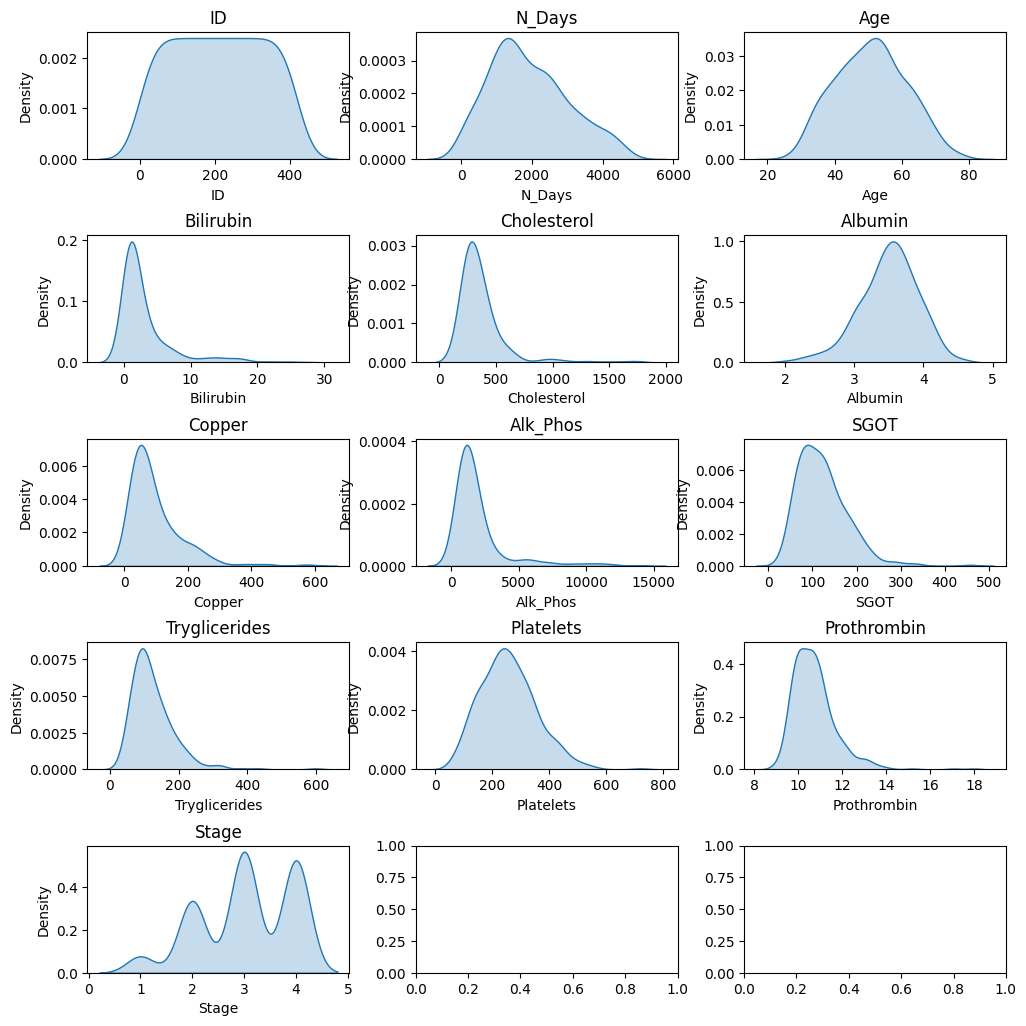

In [1082]:
#KDE PLOT
# Create subplots for kde plots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 10))
fig.tight_layout()

# Iterate through the list and create kde plots
for i, k in enumerate(numerical_cols):
    row, col = divmod(i, 3)
    sns.kdeplot(data = cirrhosis_data,x=k, fill=True, ax=axes[row, col])
    axes[row, col].set_title(k)
plt.subplots_adjust(hspace=0.6)
plt.show()

<Axes: xlabel='count', ylabel='Stage'>

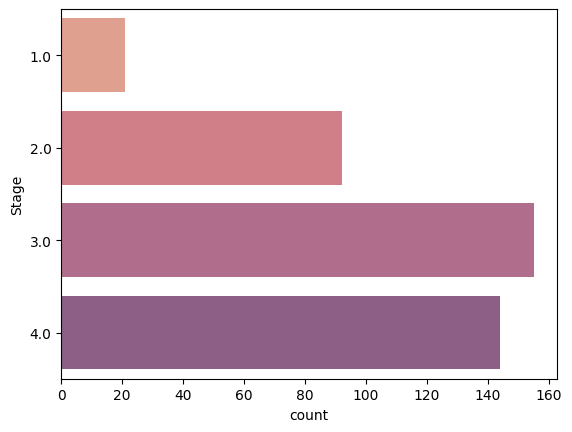

In [1083]:
#countplot to show the Stages Count
sns.countplot(y=cirrhosis_data['Stage'], palette="flare", alpha=0.8)

There is an imbalance in the Stage counts as we can clearly see, we will perform SMOTE on it to resolve the imbalance.

<Axes: xlabel='count', ylabel='Status'>

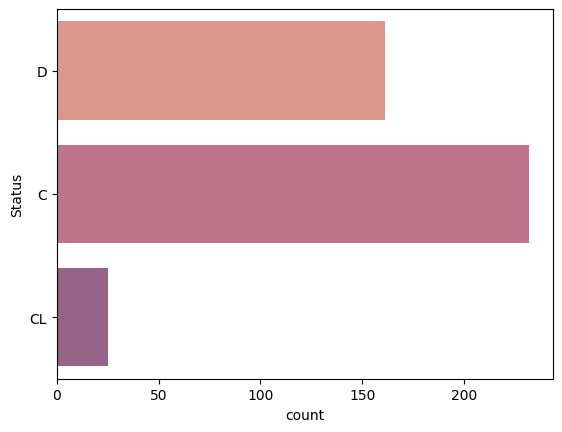

In [1084]:
#countplot to show the Status
sns.countplot(y=cirrhosis_data['Status'], palette="flare", alpha=0.8)

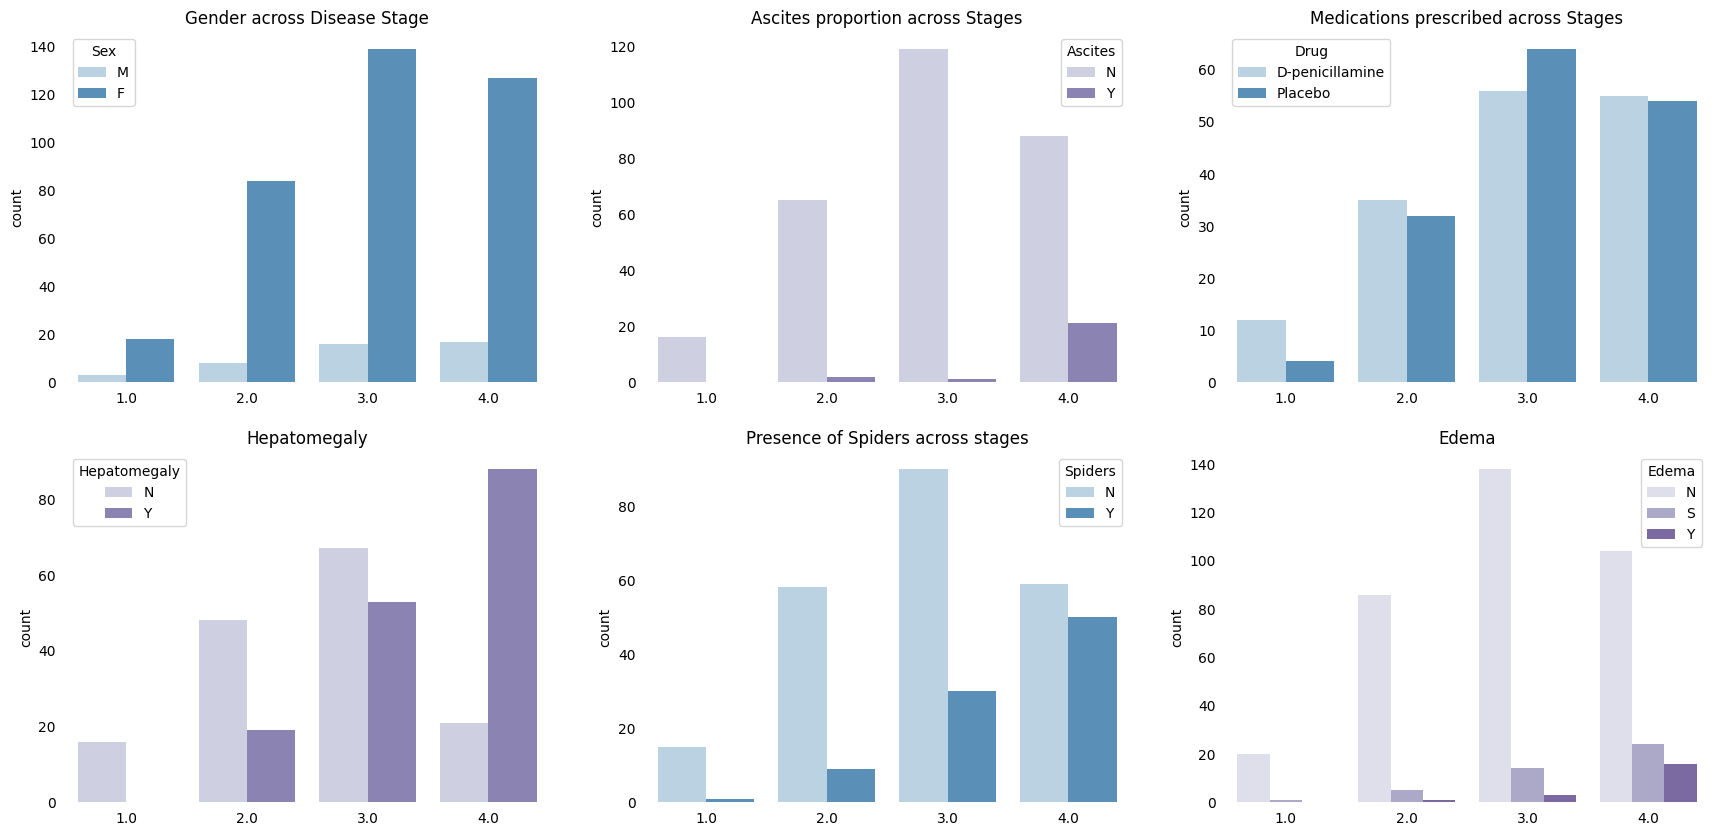

In [1085]:
plt.figure(figsize=(21.2,10))

plt.subplot(2,3,1)
sns.countplot(x=cirrhosis_data['Stage'], hue=cirrhosis_data['Sex'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Gender across Disease Stage')

plt.subplot(2,3,2)
sns.countplot(x=cirrhosis_data['Stage'], hue=cirrhosis_data['Ascites'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Ascites proportion across Stages')

plt.subplot(2,3,3)
sns.countplot(x=cirrhosis_data['Stage'], hue=cirrhosis_data['Drug'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Medications prescribed across Stages');

plt.subplot(2,3,4)
sns.countplot(x=cirrhosis_data['Stage'], hue=cirrhosis_data['Hepatomegaly'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Hepatomegaly');

plt.subplot(2,3,5)
sns.countplot(x=cirrhosis_data['Stage'], hue=cirrhosis_data['Spiders'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Presence of Spiders across stages');

plt.subplot(2,3,6)
sns.countplot(x=cirrhosis_data['Stage'], hue=cirrhosis_data['Edema'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Edema');

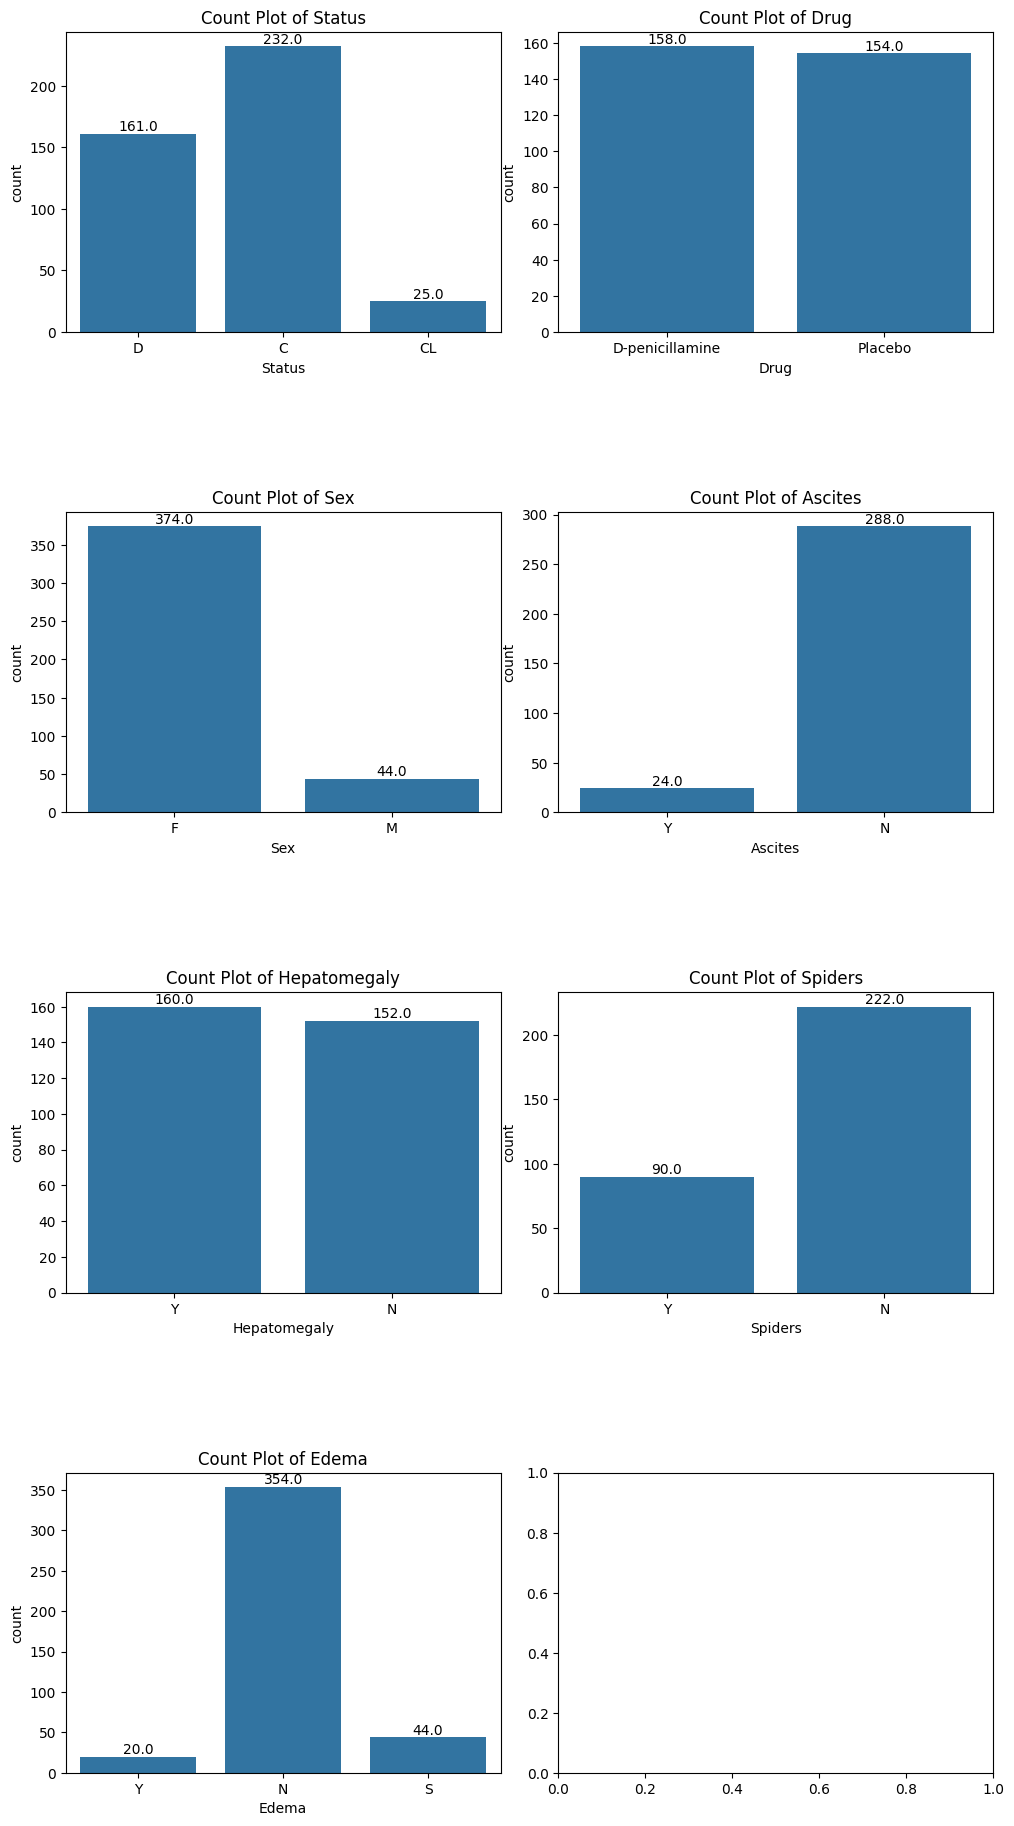

In [1086]:
# Countplot for categorical features
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 18))
fig.tight_layout()

# Iterate through the list of categorical features and create count plots
for i, feature in enumerate(categorical_cols):
    row, col = divmod(i, 2)
    ax = sns.countplot(data=cirrhosis_data, x=feature, ax=axes[row, col])
     # Add count annotations above each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    axes[row, col].set_title(f'Count Plot of {feature}')
plt.subplots_adjust(hspace=0.6)
plt.show()

### Correlation Matrix

<Axes: >

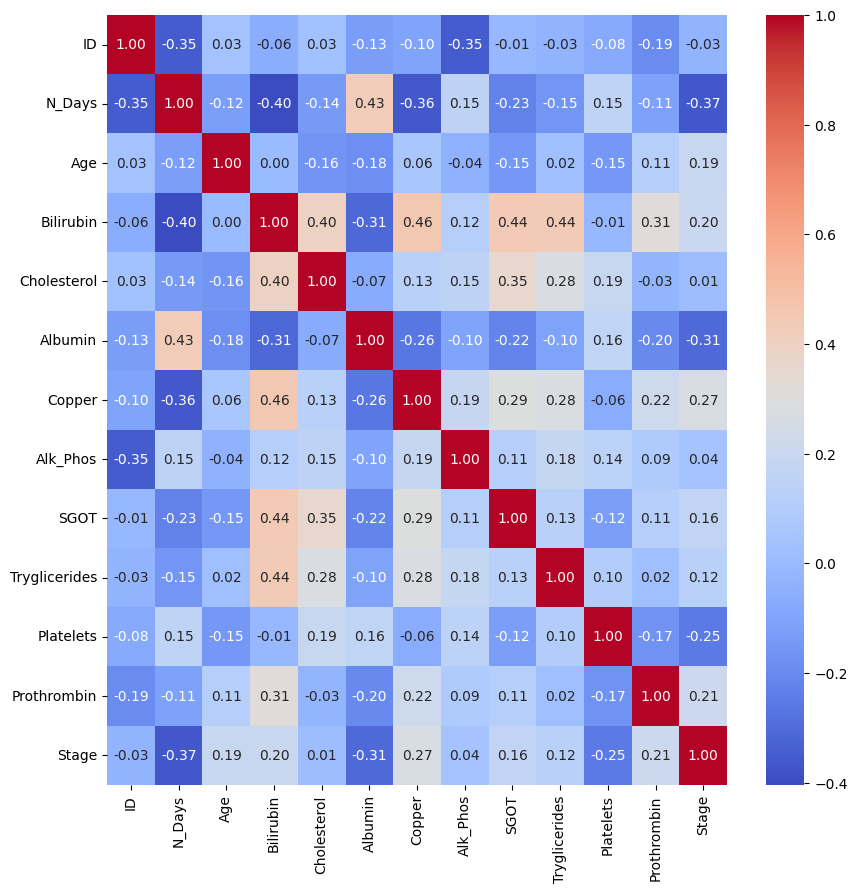

In [1087]:
# Correlation Matrix 
plt.figure(figsize=(10,10))
sns.heatmap(cirrhosis_data[numerical_cols].corr(), fmt=".2f", annot=True, cmap="coolwarm")

<Axes: xlabel='x', ylabel='y'>

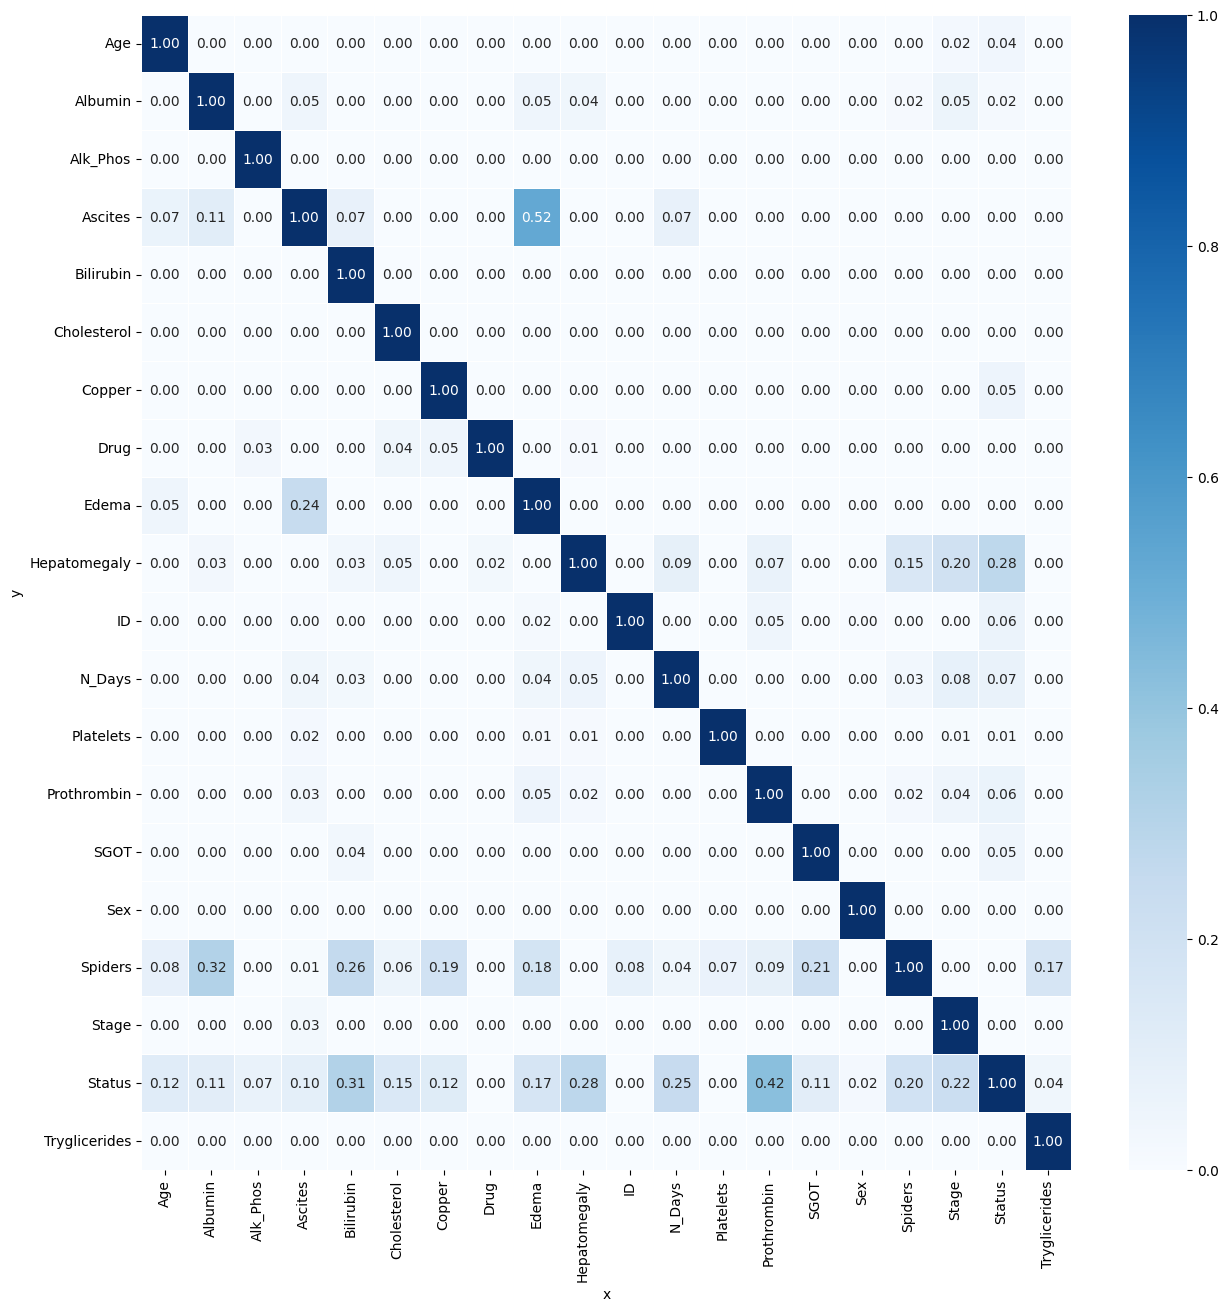

In [1088]:
# Predictive Power Score
import ppscore as pps
#Create another dataframe to used with pps (just in case that adjusting the features for this)
df_pps=cirrhosis_data.copy()
matrix_df_pps = pps.matrix(df_pps)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize=(15,15))
sns.heatmap(matrix_df_pps, vmin=0, vmax=1, fmt=".2f", cmap="Blues", linewidths=0.5, annot=True)

There is no clear indication from the heatmap and pps score.

## Data Preprocessing

# Imputation

In [1089]:
cirrhosis_data.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [1090]:
# Drop rows with missing values in columns with less null values
columns_to_dropna = ['Platelets', 'Prothrombin', 'Stage']
cirrhosis_data = cirrhosis_data.dropna(subset=columns_to_dropna)

In [1091]:
# Impute missing values for numeric columns with median
cirrhosis_data[numerical_cols] = cirrhosis_data[numerical_cols].apply(lambda x: x.fillna(x.median()))

# Impute missing values for categorical columns with mode
cirrhosis_data[categorical_cols] = cirrhosis_data[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [1092]:
#Drop unnecessary columns
cirrhosis_data.drop(columns=['ID'],inplace=True)

In [1093]:
cirrhosis_data.dropna()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,70.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,55.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,D,D-penicillamine,67.0,F,N,Y,N,N,1.2,310.0,2.96,73.0,1264.0,116.25,108.0,174.0,10.9,3.0
414,1103,C,D-penicillamine,39.0,F,N,Y,N,N,0.9,310.0,3.83,73.0,1264.0,116.25,108.0,180.0,11.2,4.0
415,1055,C,D-penicillamine,57.0,F,N,Y,N,N,1.6,310.0,3.42,73.0,1264.0,116.25,108.0,143.0,9.9,3.0
416,691,C,D-penicillamine,58.0,F,N,Y,N,N,0.8,310.0,3.75,73.0,1264.0,116.25,108.0,269.0,10.4,3.0


In [1094]:
#checking the null values
cirrhosis_data.isna().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [1095]:
#converting the Stage into int data type
cirrhosis_data['Stage'] = cirrhosis_data['Stage'].astype(int)
y = cirrhosis_data['Stage']
y

0      4
1      3
2      4
3      4
4      3
      ..
413    3
414    4
415    3
416    3
417    4
Name: Stage, Length: 399, dtype: int32

In [1096]:
#checking the stages
y.unique()

array([4, 3, 2, 1])

In [1097]:
#Mapping status to be D-0,C-1,CL-3 as mentioned in the dataset description
mapping_dict = {
    'D':0,
    'C':1,
    'CL':2
}
cirrhosis_data['Status']= cirrhosis_data['Status'].map(mapping_dict)

# Encoding

In [1098]:
cols_for_label_encoder = ['Drug', 'Hepatomegaly', 'Sex', 'Spiders', 'Ascites','Edema','Stage']

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in cols_for_label_encoder:
    cirrhosis_data[col] = label_encoder.fit_transform(cirrhosis_data[col])

In [1099]:
cirrhosis_data.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,0,0,59.0,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,3
1,4500,1,0,56.0,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,2
2,1012,0,0,70.0,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,3
3,1925,0,0,55.0,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,3
4,1504,2,1,38.0,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,2


In [1100]:
X = cirrhosis_data.drop(columns=['N_Days', 'Stage'], axis=1)
X

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,0,0,59.0,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2
1,1,0,56.0,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6
2,0,0,70.0,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0
3,0,0,55.0,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3
4,2,1,38.0,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,67.0,0,0,1,0,0,1.2,310.0,2.96,73.0,1264.0,116.25,108.0,174.0,10.9
414,1,0,39.0,0,0,1,0,0,0.9,310.0,3.83,73.0,1264.0,116.25,108.0,180.0,11.2
415,1,0,57.0,0,0,1,0,0,1.6,310.0,3.42,73.0,1264.0,116.25,108.0,143.0,9.9
416,1,0,58.0,0,0,1,0,0,0.8,310.0,3.75,73.0,1264.0,116.25,108.0,269.0,10.4


In [1101]:
y.unique()

array([4, 3, 2, 1])

#### Balancing the imbalanced target column "Stage" using Synthetic Minority Over-Sampling Technique(SMOTE)

In [1102]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X,y = smote.fit_resample(X,y)

### Finding Outliers

In [1103]:
#finding outliers for X_train datasets
def outlier_count(col, data = cirrhosis_data):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [1104]:
for col in cirrhosis_data.columns:
    outlier_count(col)


---------------Sex---------------

Number of outliers: 43
Percent of data that is outlier: 10.78%

---------------Ascites---------------

Number of outliers: 24
Percent of data that is outlier: 6.02%

---------------Spiders---------------

Number of outliers: 90
Percent of data that is outlier: 22.56%

---------------Edema---------------

Number of outliers: 63
Percent of data that is outlier: 15.79%

---------------Bilirubin---------------

Number of outliers: 44
Percent of data that is outlier: 11.03%

---------------Cholesterol---------------

Number of outliers: 41
Percent of data that is outlier: 10.28%

---------------Albumin---------------

Number of outliers: 9
Percent of data that is outlier: 2.26%

---------------Copper---------------

Number of outliers: 43
Percent of data that is outlier: 10.78%

---------------Alk_Phos---------------

Number of outliers: 42
Percent of data that is outlier: 10.53%

---------------SGOT---------------

Number of outliers: 20
Percent of data 

In [1105]:
for col in cirrhosis_data.columns:
    if cirrhosis_data[col].dtypes != 'object':
        q75, q25 = np.percentile(cirrhosis_data[col], [75, 25])
        iqr = q75 - q25
        min_val = q25 - (iqr * 1.5)
        max_val = q75 + (iqr * 1.5)
        cirrhosis_data[col] = np.where(cirrhosis_data[col]>min_val,min_val,np.where(cirrhosis_data[col]<max_val,max_val,cirrhosis_data[col]))

In [1106]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)

# Display feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores.sort_values(by='Score', ascending=False, inplace=True)
print("Feature Scores:\n", feature_scores)

# Select the top k features (adjust k as needed)
k = 10
selected_features = feature_scores.head(k)['Feature'].tolist()
X_selected = X[selected_features]

# Display selected features
print(f"Selected Features (Top {k}):\n", selected_features)

Feature Scores:
           Feature      Score
5    Hepatomegaly  76.555988
10        Albumin  41.866466
6         Spiders  30.624318
7           Edema  23.999653
13           SGOT  23.507951
11         Copper  22.226586
1            Drug  21.450211
8       Bilirubin  20.532990
4         Ascites  18.972515
0          Status  17.534064
16    Prothrombin  15.445668
15      Platelets  14.601629
2             Age  12.757611
9     Cholesterol  12.522516
14  Tryglicerides   7.509111
12       Alk_Phos   7.284806
3             Sex   4.849121
Selected Features (Top 10):
 ['Hepatomegaly', 'Albumin', 'Spiders', 'Edema', 'SGOT', 'Copper', 'Drug', 'Bilirubin', 'Ascites', 'Status']


In [1107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3,random_state=1)

In [1108]:
print(np.unique(y_train))
print(np.unique(y_test))

[1 2 3 4]
[1 2 3 4]


In [1109]:
X_train[selected_features].isna().sum()

Hepatomegaly    0
Albumin         0
Spiders         0
Edema           0
SGOT            0
Copper          0
Drug            0
Bilirubin       0
Ascites         0
Status          0
dtype: int64

In [1110]:
print(np.unique(y))

[1 2 3 4]


# Scaling

In [1111]:
# Check overview of data before scale
X_train

,Hepatomegaly,Albumin,Spiders,Edema,SGOT,Copper,Drug,Bilirubin,Ascites,Status
133,0,3.600000,0,0,155.000000,79.000000,0,1.100000,0,1
277,1,3.520000,0,0,71.000000,97.000000,1,1.300000,0,1
481,0,3.717241,0,0,71.138255,63.717619,0,0.607643,0,1
161,1,3.450000,0,0,133.300000,80.000000,0,4.000000,0,0
361,1,3.660000,0,0,116.250000,73.000000,0,1.700000,0,1
...,...,...,...,...,...,...,...,...,...,...
129,0,3.950000,0,0,128.650000,13.000000,1,1.500000,0,0
144,1,3.260000,0,0,198.400000,247.000000,1,7.200000,0,0
72,1,2.530000,1,1,182.900000,207.000000,0,17.100000,1,0
235,0,3.720000,0,0,51.150000,24.000000,0,0.400000,0,1


In [1112]:
X_train['Drug']

133    0
277    1
481    0
161    0
361    0
      ..
129    1
144    1
72     0
235    0
37     0
Name: Drug, Length: 428, dtype: int32

In [1113]:
# Check overview of data before scale
X_test

,Hepatomegaly,Albumin,Spiders,Edema,SGOT,Copper,Drug,Bilirubin,Ascites,Status
493,1,3.496705,0,0,116.250000,73.000000,0,6.135269,0,0
472,0,3.494779,0,0,56.890156,65.119830,0,0.788017,0,1
107,1,3.540000,1,0,108.500000,74.000000,0,1.900000,0,0
558,0,3.352937,0,0,165.310314,77.009037,0,2.945407,0,0
535,0,3.597326,0,0,63.458072,131.653345,0,0.445544,0,1
...,...,...,...,...,...,...,...,...,...,...
587,0,3.656407,0,0,87.779441,106.682668,0,0.698289,0,1
42,1,3.550000,1,2,119.350000,131.000000,1,3.300000,0,0
334,1,4.190000,0,0,116.250000,73.000000,0,0.600000,0,1
305,0,3.350000,0,0,171.000000,39.000000,0,1.700000,0,1


In [1114]:
y_test

493    1
472    1
107    3
558    2
535    2
      ..
587    2
42     3
334    1
305    2
81     3
Name: Stage, Length: 184, dtype: int32

In [1115]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [1116]:
# Check overview of data after scale
X_train

array([[-0.94541277,  0.08255642, -0.43080804, ..., -0.39886781,
        -0.20952909,  0.59116369],
       [ 1.05773904, -0.12170226, -0.43080804, ..., -0.34835491,
        -0.20952909,  0.59116369],
       [-0.94541277,  0.38189893, -0.43080804, ..., -0.52321976,
        -0.20952909,  0.59116369],
       ...,
       [ 1.05773904, -2.64940344,  2.32121944, ...,  3.6421643 ,
         4.77260702, -1.29703077],
       [-0.94541277,  0.38894444, -0.43080804, ..., -0.57566296,
        -0.20952909,  0.59116369],
       [ 1.05773904, -1.44938369, -0.43080804, ..., -0.49989361,
        -0.20952909, -1.29703077]])

In [1117]:
# Check overview of data after scale
X_test

array([[ 1.05773904, -0.18117885, -0.43080804, ...,  0.87286248,
        -0.20952909, -1.29703077],
       [-0.94541277, -0.18609726, -0.43080804, ..., -0.47766364,
        -0.20952909,  0.59116369],
       [ 1.05773904, -0.07063759,  2.32121944, ..., -0.1968162 ,
        -0.20952909, -1.29703077],
       ...,
       [ 1.05773904,  1.58896419, -0.43080804, ..., -0.52515006,
        -0.20952909,  0.59116369],
       [-0.94541277, -0.55575196, -0.43080804, ..., -0.24732911,
        -0.20952909,  0.59116369],
       [-0.94541277,  0.49107378, -0.43080804, ..., -0.57566296,
        -0.20952909,  0.59116369]])

In [1118]:
#Experiment Tracking
import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("http://localhost:5000")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "sonu"
# mlflow.create_experiment(name="chaky-diabetes-example")  #create if you haven't create
mlflow.set_experiment(experiment_name="liver-cirrhosis")

<Experiment: artifact_location='mlflow-artifacts:/341323868418551242', creation_time=1700823819169, experiment_id='341323868418551242', last_update_time=1700823819169, lifecycle_stage='active', name='liver-cirrhosis', tags={}>

In [1119]:
if mlflow.active_run():
    mlflow.end_run()

# Modeling

### Cross Validation

In [1120]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, make_scorer
import mlflow
import mlflow.sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier 

# Create classifiers
dt=DecisionTreeClassifier()
svm=SVC()
knn=KNeighborsClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
rf=RandomForestClassifier()

models = [dt,svm,knn,gb,xgb,rf]

#3.2 perform cross validation using KFold
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits = 5, shuffle = True, random_state=999)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for model in models:
    with mlflow.start_run():

        accuracy = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        precision = cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision_macro')  # Use 'macro' or 'weighted'
        recall = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall_macro')  # Use 'macro' or 'weighted'
        f1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_macro')  # Use 'macro' or 'weighted'

        # Log metrics to MLflow
        mlflow.log_param("model", model.__class__.__name__)
        mlflow.log_metric("accuracy_mean", accuracy.mean())
        mlflow.log_metric("accuracy_std", accuracy.std())
        mlflow.log_metric("precision_mean", precision.mean())
        mlflow.log_metric("precision_std", precision.std())
        mlflow.log_metric("recall_mean", recall.mean())
        mlflow.log_metric("recall_std", recall.std())
        mlflow.log_metric("f1_mean", f1.mean())
        mlflow.log_metric("f1_std", f1.std())

        # Log the model
        mlflow.sklearn.log_model(model, "model")
        
        print(f"Model: {model.__class__.__name__}")
        print("Accuracy : ", accuracy, "- Mean: ", accuracy.mean(), "- Std: ", accuracy.std())
        print("Precision: ", precision, "- Mean: ", precision.mean(), "- Std: ", precision.std())
        print("Recall   : ", recall, "- Mean: ", recall.mean(), "- Std: ", recall.std())
        print("F1       : ", f1, "- Mean: ", f1.mean(), "- Std: ", f1.std())
        print("\n")

    mlflow.end_run()

Model: DecisionTreeClassifier
Accuracy :  [0.44186047 0.47674419 0.55813953 0.47058824 0.57647059] - Mean:  0.5047606019151847 - Std:  0.05272708987005039
Precision:  [0.48791782 0.47101285 0.55549663 0.48930939 0.56282468] - Mean:  0.5133122713104367 - Std:  0.03805589773652243
Recall   :  [0.46805556 0.50080515 0.60371377 0.50617026 0.59330144] - Mean:  0.5344092334481351 - Std:  0.05403867997005254
F1       :  [0.45218034 0.44392857 0.53691385 0.53636093 0.51504329] - Mean:  0.4968853954980686 - Std:  0.04072658019432936


Model: SVC
Accuracy :  [0.51162791 0.56976744 0.52325581 0.56470588 0.50588235] - Mean:  0.5350478796169631 - Std:  0.026919216207103865
Precision:  [0.52331349 0.56608277 0.50876433 0.55036293 0.5102657 ] - Mean:  0.531757845467689 - Std:  0.022743222312405154
Recall   :  [0.53472222 0.54549114 0.51222826 0.58514753 0.51196172] - Mean:  0.5379101753615483 - Std:  0.026951380427419395
F1       :  [0.49317509 0.52344711 0.50924837 0.55421573 0.48688258] - Mean:  0.

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ML\ml-stage-prediction\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\ML\ml-stage-prediction\venv\lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
  File "d:\ML\ml-stage-prediction\venv\lib\site-packages\xgboost\sklearn.py", line 1467, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]


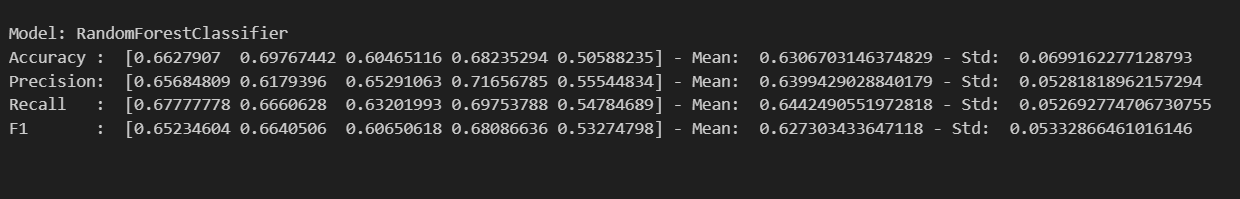

### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define multiple scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

model = RandomForestClassifier(random_state=999)
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
#refit means it will pick the best model, and fit again, so it means grid is already the best model after this line
#with mlflow.start_run():

grid = GridSearchCV(model, param_grid, scoring=scoring, cv=kfold, refit='accuracy', return_train_score=True)
#scoring = f1, recall, precision, accuracy

#fit the grid, which will basically do cross validation across all combinatiosn, here we only have 3 comb
grid.fit(X_train, y_train)  #remember to use only training set here....


#print the best parameters and accuracy
print(grid.best_params_)
print(grid.best_score_)
#print(grid.cv_results_)

#mlflow.end_run()

{'max_depth': None, 'n_estimators': 100}
0.6167441860465117


## Testing

In [ ]:
# Predictions on the test set
y_pred = grid.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print("Model:", model.__class__.__name__)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("")

Model: RandomForestClassifier
Accuracy: 0.6195652173913043
Precision: 0.6134452646628703
Recall: 0.6238036980273005
F1 Score: 0.616249322147437



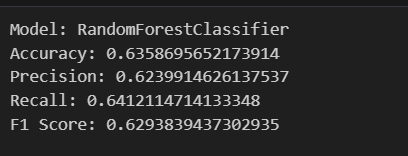

### Confusion Matrix

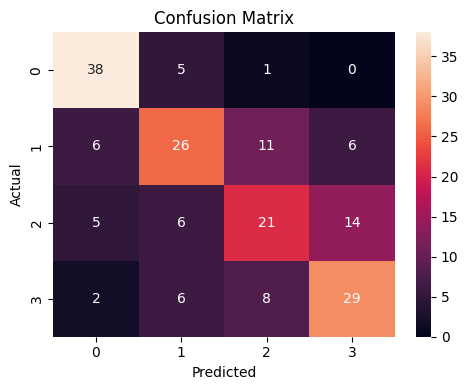

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        44
           1       0.60      0.53      0.57        49
           2       0.51      0.46      0.48        46
           3       0.59      0.64      0.62        45

    accuracy                           0.62       184
   macro avg       0.61      0.62      0.62       184
weighted avg       0.61      0.62      0.61       184



In [ ]:
from sklearn.metrics import confusion_matrix ,classification_report
confusion_matrix_sklearn = confusion_matrix(np.ravel(y_test), y_pred)
confusion_matrix_sklearn
# Visualized the sklearn confusion matrix via heatmap
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix_sklearn, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()

print(classification_report(y_test, y_pred))

0.63 

## Analysis : Feature Importance

In [ ]:
grid.best_estimator_

RandomForestClassifier(random_state=999)

In [ ]:
importances = grid.best_estimator_.feature_importances_
importances

array([0.07755797, 0.18664675, 0.03189538, 0.01714653, 0.03834768,
       0.13577255, 0.13603194, 0.00709947, 0.1930332 , 0.17646851])

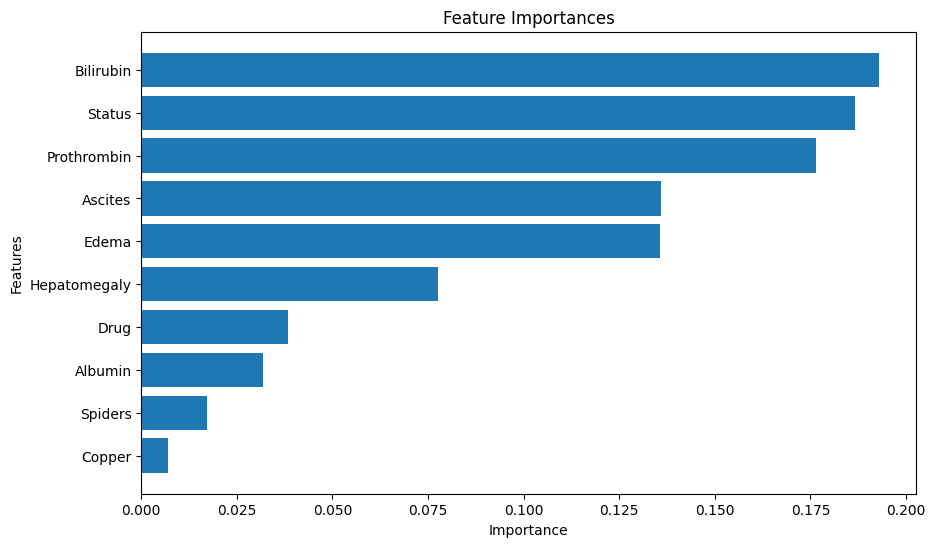

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a trained logistic regression model
feature_names = ['Hepatomegaly', 'Status', 'Albumin', 'Spiders', 'Drug', 'Edema', 'Ascites', 'Copper', 'Bilirubin', 'Prothrombin']

feature_importance = pd.DataFrame({'features': feature_names, 'importance': importances})
feature_importance = feature_importance.sort_values(by='importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['features'], feature_importance['importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

## Inference

In [ ]:
import pickle

# Save the model to disk
pickle.dump(grid, open('stage_prediction_updated.pkl', 'wb'))

In [ ]:
#load the model from disk
loaded_model = pickle.load(open('stage_prediction_updated.pkl', 'rb'))

In [ ]:
X_test[0]

array([-0.92783057, -1.17459771, -0.42698998, -0.31315373, -0.61696447,
       -0.88976632, -1.28419798, -0.20952909, -1.17252735, -0.37503941])

In [ ]:
y_test

493    0
472    0
107    2
558    1
535    1
      ..
587    1
42     2
334    0
305    1
81     2
Name: Stage, Length: 184, dtype: int64

In [ ]:
y_test.iloc[0]

0

In [ ]:
sample = np.array([[-0.96329016, -0.71446575,  0.84368909, -0.43461349, -0.31715305,
       -0.77376086, -0.27784898, -0.90109402, -0.20952909, -0.61335617]])

In [ ]:
# Make predictions
predictions = loaded_model.predict(sample)

# Print the predictions
print(predictions)

[1]
